# EDA of Claim Dataaset
# 02_EDA_Claim

| Date | User | Change Type | Remarks |  
| ---- | ---- | ----------- | ------- |
| 24/09/2025 | Adrienne | Created   | Created to do EDA for Claim Dataset | 
| 27/09/2025 | Adrienne | Update | Added code from Martin |

# Content

* [Introduction](#introduction)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from datetime import datetime
import json_lines
import seaborn as sns

KeyboardInterrupt: 

In [1]:
# readin clean datafiles
path = "../data/clean/"
#claim_df =  pd.read_pickle(path + 'claim.pkl')
claim_df = pd.read_pickle(path + 'claim_sample.pkl')
#claim_df = pd.read_pickle(path + 'claim_mini_sample.pkl')
#claim_response_df =  pd.read_pickle(path + 'claim_response.pkl')


KeyboardInterrupt



In [56]:
print(f"Number of non-NaN DRG entries: {claim_df.shape[0] - claim_df['diagnosis_ls'].apply(lambda x: len(x) == 0).sum()} out of {len(claim_df)}")

Number of non-NaN DRG entries: 9984 out of 10000


In [57]:
non_na_drg = claim_df[~claim_df['diagnosis_ls'].apply(lambda x: len(x) == 0)]
non_na_drg['ls_len'] = non_na_drg['diagnosis_ls'].str.len()


/var/folders/h7/vnb5cqf52l31_n7r6zv3j6z80000gn/T/ipykernel_11889/2224548505.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_na_drg['ls_len'] = non_na_drg['diagnosis_ls'].str.len()


In [58]:
non_na_drg.head()

,billablePeriod_end,billablePeriod_start,contained_0_birthDate,contained_0_gender,contained_0_id,contained_0_identifier_0_type_coding_0_code,contained_0_identifier_0_type_coding_0_display,contained_0_identifier_0_value,contained_0_name_0_family,contained_0_name_0_given,...,drg_code,provider_number,national_provider_identifier,type_of_bill,claim_type,location_of_bill,diagnosis_ls,hcpcs_ls,procedure_ls,ls_len
23118,2019-05-17,2019-05-17,1948-06-14,female,patient,MC,Patient's Medicare Number,1S00E00AD09,Ward668,"[""Oralia106""]",...,NaN,220020,8886688687,1,institutional,2,"[K011, G43719, R52, E669, E785, K3520, K37, Z9...","[99241, 00777310502]",[],12
118862,2019-12-20,2019-12-20,1950-10-10,male,patient,MC,Patient's Medicare Number,1S00E00JX65,Kuhlman484,"[""Carlos172""]",...,NaN,360090,8885287986,1,institutional,2,"[E669, E785]",[],[],2
13932,2015-10-13,2015-10-13,1942-09-22,female,patient,MC,Patient's Medicare Number,1S00E00GU18,Ledner144,"[""Hermila490""]",...,NaN,100264,8887886249,1,institutional,2,"[M810, E785]",[],[],2
17457,2014-03-05,2014-03-05,1946-02-18,female,patient,MC,Patient's Medicare Number,1S00E00GK12,O'Hara248,"[""Mila257""]",...,NaN,080001,8888088878,1,institutional,2,"[P2981, C50919]",[],[],2
125808,2019-07-07,2019-07-07,1947-05-04,female,patient,MC,Patient's Medicare Number,1S00E00AG56,Rice937,"[""Filomena21""]",...,NaN,220070,8886688182,1,institutional,2,"[E669, J329, E034, D649, E785, B349]","[99241, 00777310502]",[],6


In [59]:
na_drg = claim_df[claim_df['diagnosis_ls'].apply(lambda x: len(x) == 0)]

<Axes: xlabel='count', ylabel='ls_len'>

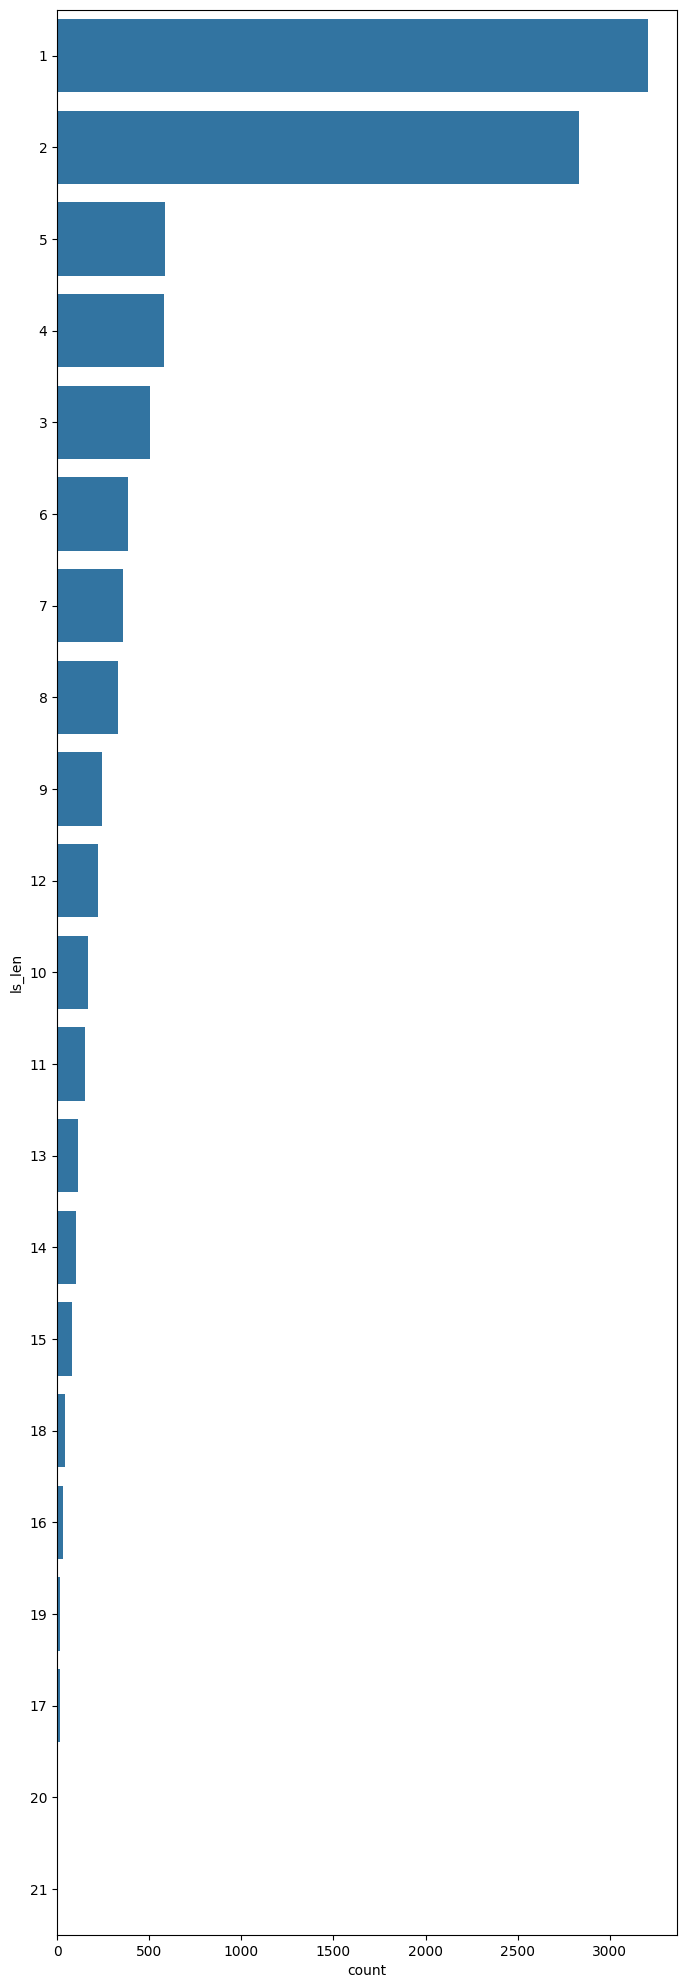

In [60]:
fig, ax = plt.subplots(figsize=(8, 25))
sns.countplot(y='ls_len', data=non_na_drg, order=non_na_drg['ls_len'].value_counts().index)

In [61]:
print(len(non_na_drg[non_na_drg['ls_len']== 21]))

2


In [37]:
# fig, ax = plt.subplots(figsize=(8, 25))
# sns.countplot(y='diagnosis_ls', data=non_na_drg, order=non_na_drg['diagnosis_ls'].value_counts().index)

In [62]:
print(f"Number of non-NaN HCPCS entries: {claim_df.shape[0] - claim_df['hcpcs_ls'].apply(lambda x: len(x) == 0).sum()} out of {len(claim_df)}")

Number of non-NaN HCPCS entries: 5158 out of 10000


In [63]:
non_na_hcpcs = claim_df[~claim_df['hcpcs_ls'].apply(lambda x: len(x) == 0)]
non_na_hcpcs['ls_len'] = non_na_hcpcs['hcpcs_ls'].str.len()


/var/folders/h7/vnb5cqf52l31_n7r6zv3j6z80000gn/T/ipykernel_11889/3190909164.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_na_hcpcs['ls_len'] = non_na_hcpcs['hcpcs_ls'].str.len()


<Axes: xlabel='count', ylabel='ls_len'>

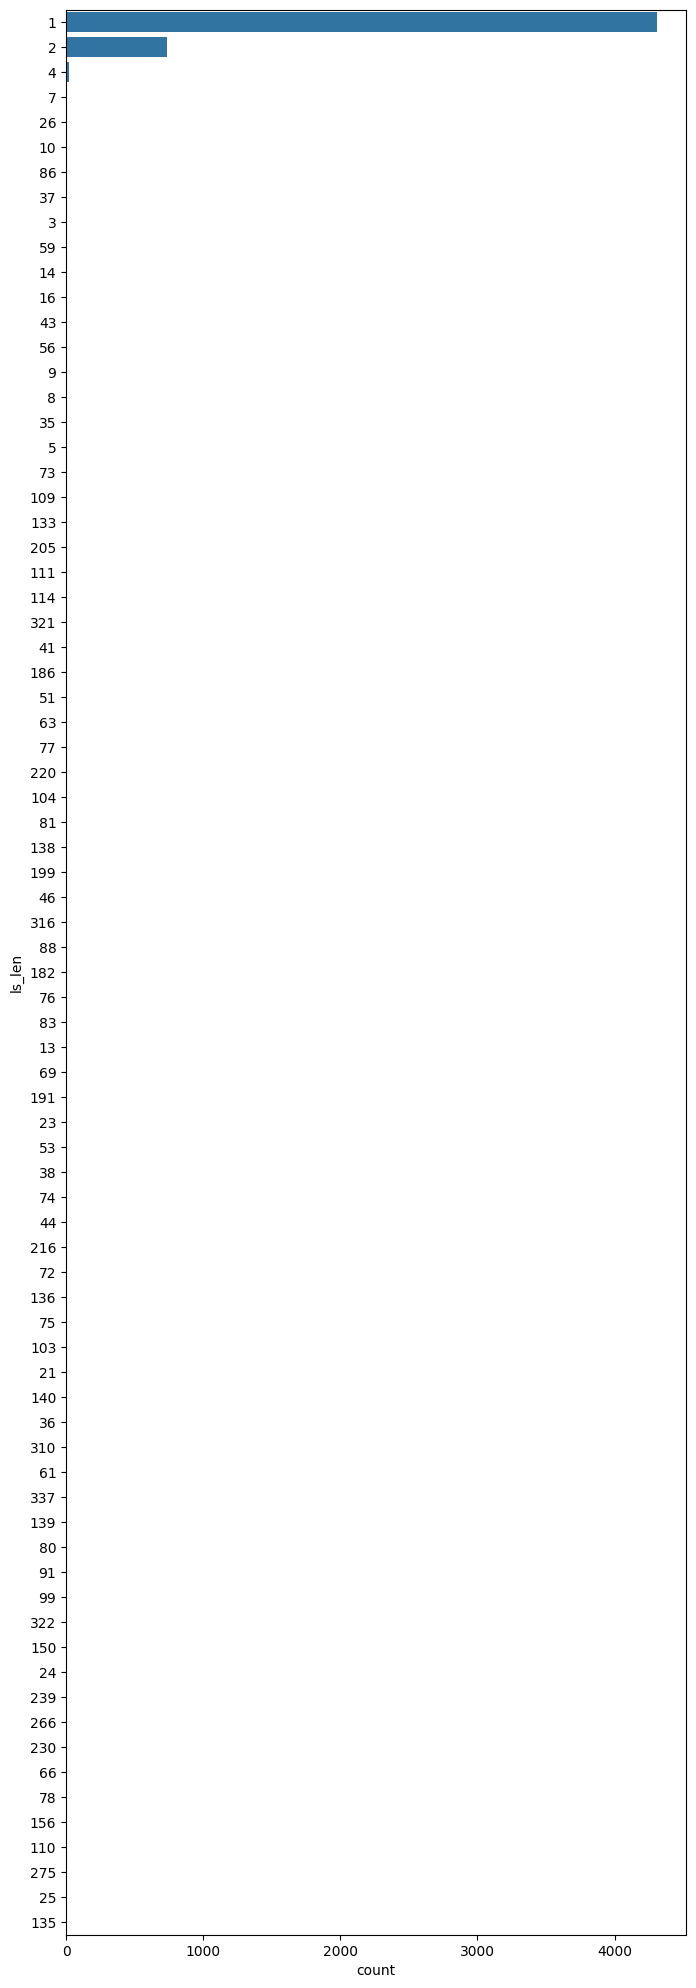

In [64]:
fig, ax = plt.subplots(figsize=(8, 25))
sns.countplot(y='ls_len', data=non_na_hcpcs, order=non_na_hcpcs['ls_len'].value_counts().index)

In [65]:
print(f'max length: {non_na_hcpcs['ls_len'].max()}')

max length: 337


In [66]:
# Percentage breakdown
vals = non_na_drg['diagnosis_ls'].value_counts(normalize=True) * 100
pd.DataFrame({
  'drg_breakdown': vals
}).head(20)

,drg_breakdown
diagnosis_ls,
[E669],5.649038
[D649],2.914663
[E785],2.864583
[J329],2.504006
[R739],1.612580
[O039],1.532452
[I10],1.412260
[P292],1.302083
[E781],1.272035


In [67]:
# Percentage breakdown
vals = non_na_hcpcs['hcpcs_ls'].value_counts(normalize=True) * 100
pd.DataFrame({
  'hcpcs_breakdown': vals
}).head(10)

,hcpcs_breakdown
hcpcs_ls,
[99241],50.697945
[G0444],19.658782
"[99241, 00777310502]",7.987592
[99221],6.320279
"[G0444, 00777310502]",2.636681
"[99221, 00777310502]",1.027530
"[G0444, G9573]",0.814269
"[G0444, G9572]",0.678558
[G8111],0.601008


In [68]:
# Percentage breakdown
vals = claim_df['procedure_ls'].value_counts(normalize=True) * 100
pd.DataFrame({
  'procedure_breakdown': vals
}).head(10)

,procedure_breakdown
procedure_ls,
[],92.60
[BW03ZZZ],0.92
[0U2DXHZ],0.71
[BH00ZZZ],0.40
[BH01ZZZ],0.40
[BH02ZZZ],0.40
[09JY4ZZ],0.33
[B244ZZZ],0.22
[0DBM0ZX],0.18


In [69]:
# Percentage breakdown
vals = claim_df['type_of_bill'].value_counts(normalize=True) * 100
pd.DataFrame({
  'bill_type_breakdown': vals
}).head(10)

,bill_type_breakdown
type_of_bill,
1,95.380399
B,4.619601


In [70]:
# Percentage breakdown
vals = claim_df['claim_type'].value_counts(normalize=True) * 100
pd.DataFrame({
  'claim_type_breakdown': vals
}).head(10)

,claim_type_breakdown
claim_type,
institutional,76.63
professional,23.37


In [71]:
# Percentage breakdown
vals = claim_df['location_of_bill'].value_counts(normalize=True) * 100
pd.DataFrame({
  'location_of_bill_breakdown': vals
}).head(10)

,location_of_bill_breakdown
location_of_bill,
2,90.695550
4,7.007699
3,1.526817
9,0.769933
